In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

## Tips Dataset

In [5]:
tips = sns.load_dataset('tips')
train, test = train_test_split(tips, random_state=42)
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
scaler = MinMaxScaler()

numeric_columns = list(train.select_dtypes('number').columns)
train[numeric_columns] = scaler.fit_transform(train[numeric_columns])
train.head()

,total_bill,tip,sex,smoker,day,time,size
115,0.256547,0.277778,Female,No,Sun,Dinner,0.2
181,0.390146,0.516667,Male,Yes,Sun,Dinner,0.2
225,0.233466,0.166667,Female,Yes,Fri,Lunch,0.2
68,0.321349,0.112222,Male,No,Sat,Dinner,0.2
104,0.336662,0.342222,Female,No,Sat,Dinner,0.2


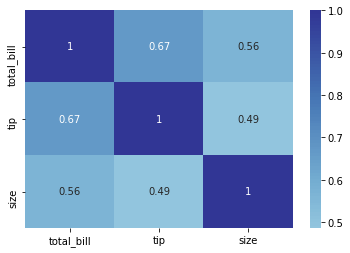

In [7]:
sns.heatmap(train.corr(), cmap='RdYlBu', annot=True, center=0)

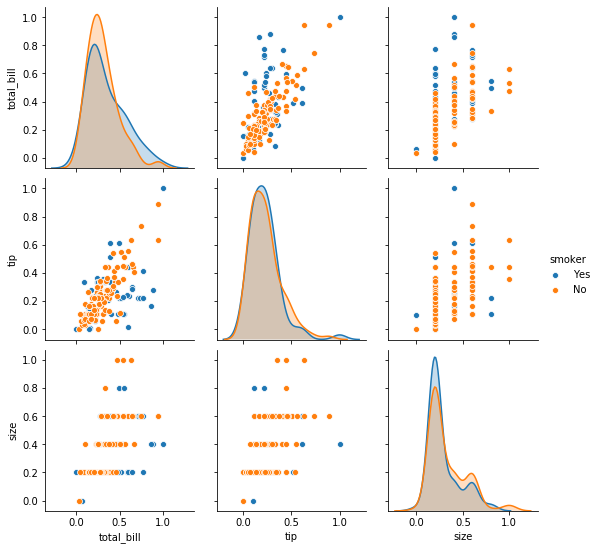

In [8]:
sns.pairplot(train, hue="smoker")

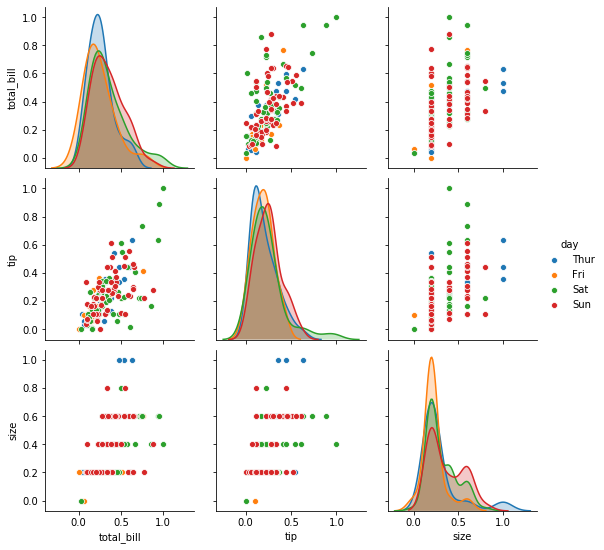

In [10]:
sns.pairplot(train, hue="day")

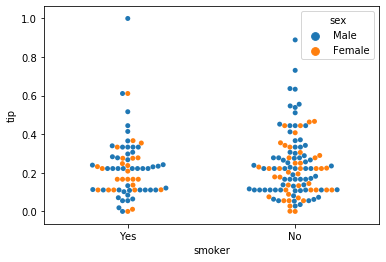

In [11]:
# Tip by smoker or gender 
sns.swarmplot(y='tip', x='smoker', data=train, hue='sex')

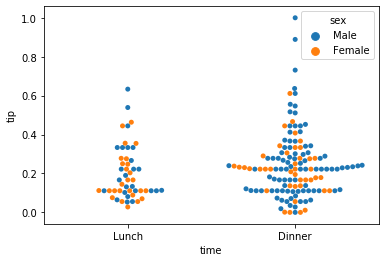

In [12]:
sns.swarmplot(y='tip', x='time', data=train, hue='sex')

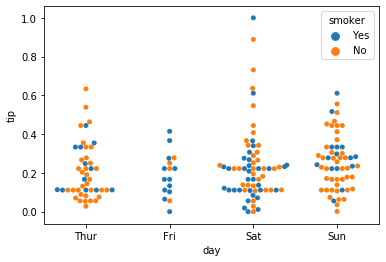

In [13]:
sns.swarmplot(y='tip', x='day', data=train, hue='smoker')

$H_0$: Smokers and non-smokers tip the same amount

$H_a$: Smokers and non-smokers tip at different rates

- Because we're comaring means of two subgroups, we use `.ttest_ind`

In [15]:
smokers = train[train.smoker == "Yes"]
nonsmokers = train[train.smoker == "No"]

alpha = 0.01 # 1 - .99 confidence level

t, p = stats.ttest_ind(smokers.tip, nonsmokers.tip)

In [17]:
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis.")
    print("We fail to reject the hypothesis that smokers and non-smokers tip the same amount")

print(p)

We fail to reject the null hypothesis.
We fail to reject the hypothesis that smokers and non-smokers tip the same amount
0.6757837996493921


## Chi^2 test 
- $H_0$: Smoking preference and day of visit are independent
- $H_a$: Smoking preference and day of visit are dependent on eachother

In [18]:
observed = pd.crosstab(train.smoker, train.day)
observed

day,Thur,Fri,Sat,Sun
smoker,,,,
Yes,12,12,32,15
No,33,4,34,41


In [19]:
alpha = 0.01 # 1 - .99 confidence level

In [20]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [21]:
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")
p

We reject the null hypothesis


0.0005239830584740401